In [1]:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
#https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
#https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting
#https://covidtracking.com/api
#https://covidtracking.com/api/states/daily?state=LA&date=20200404
#https://github.com/Jcharis/DataScienceTools/blob/master/Data_analysis_of_Coronavirus_Outbreak_with_Python/Time_Series_Prediction_of_Coronavirus_Outbreak_with_Facebook_Prophet.ipynb

In [2]:
import pandas as pd
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
from tabulate import tabulate
import datetime as dt

In [3]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
us_confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
us_death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
timestr = time.strftime("%Y%m%d-%H%M%S")

In [4]:
def get_n_melt_data(data_url, case_type):
    df = pd.read_csv(data_url)
    reshape_df = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"])
    reshape_df.rename(columns={"variable": "Date", "value": case_type}, inplace=True)
    return reshape_df

def merge_data(confirmed, recovered, deaths):
    new_df = confirmed.join(recovered["Recovered"]).join(deaths["Deaths"])
    return new_df

def fetch_data():
    confirm_df = get_n_melt_data(confirmed_cases_url, "Confirmed")
    recovered_df = get_n_melt_data(recovered_cases_url, "Recovered")
    deaths_df = get_n_melt_data(death_cases_url, "Deaths")
    print("Getting and Reshaping Data")
    df = merge_data(confirm_df, recovered_df, deaths_df)
    print("Preview")
    print(df.tail(5))
    #filename= "covid19_dataset_{}.csv".format(timestr)
    filename= "./covid19_dataset.csv"
    print("Saving Data as {}".format(filename))
    df.to_csv(filename)
    print("Done")

fetch_data()



Getting and Reshaping Data
Preview
                    Province/State         Country/Region       Lat  \
20246  Falkland Islands (Malvinas)         United Kingdom -51.79630   
20247    Saint Pierre and Miquelon                 France  46.88520   
20248                          NaN            South Sudan   6.87700   
20249                          NaN         Western Sahara  24.21550   
20250                          NaN  Sao Tome and Principe   0.18636   

            Long    Date  Confirmed  Recovered  Deaths  
20246 -59.523600  4/7/20          2        NaN       0  
20247 -56.315900  4/7/20          1        NaN       0  
20248  31.307000  4/7/20          2        NaN       0  
20249 -12.885800  4/7/20          4        NaN       0  
20250   6.613081  4/7/20          4        NaN       0  
Saving Data as ./covid19_dataset.csv
Done


In [5]:
 filename= "./covid19_dataset.csv"
 df = pd.read_csv(filename)
 df.rename(columns={df.columns[0]: 'Index','Province/State': 'Province_State', 'Country/Region': 'Country_Region'}, inplace=True)

In [6]:
df = df[['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Recovered', 'Deaths']]

In [7]:
df_per_day = df.groupby('Date')['Confirmed', 'Recovered', 'Deaths'].max()

C:\Users\chali\.conda\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [8]:
# Max No of Cases Confirmed
df_per_day['Confirmed'].max()


396223

In [9]:
# Min No of Cases Confirmed
df_per_day['Confirmed'].min()


444

C:\Users\chali\.conda\envs\my_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Max number of cases per country
Country_Region                      Confirmed    Recovered    Deaths
--------------------------------  -----------  -----------  --------
US                                     396223          401     12722
Spain                                  141942        40437     14045
Italy                                  135586         1359     17127
France                                 109069        63471     10328
Germany                                107663         3794      2016
China                                   67803        64014      3212
Iran                                    62589        22837      3872
United Kingdom                          55242        60811      6159
Turkey                                  34109        21763       725
Switzerland                             22253         8056       821
Belgium                                 22194         1669      2035
Netherlands                             19580        62570      2101
Br

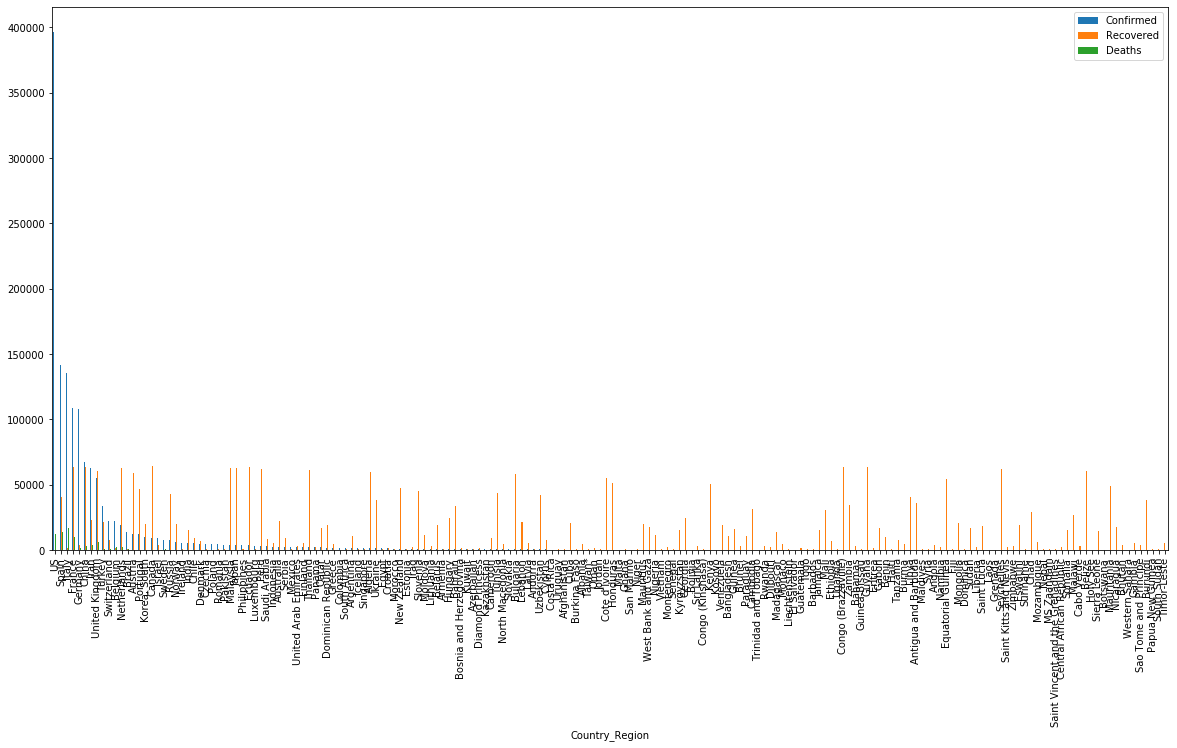

In [10]:
# Number of Cases Per Country
max_cases_per_country = df.groupby(['Country_Region'])['Confirmed', 'Recovered', 'Deaths'].max()
table_max_cases = max_cases_per_country.sort_values(by=['Confirmed'], ascending=False)
print("Max number of cases per country")
print(tabulate(table_max_cases,headers='keys'))
table_max_cases.plot(kind='bar', figsize=(20,10))

In [11]:
#Countries Affected
countries_affected = df['Country_Region'].unique()
print(countries_affected)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'L

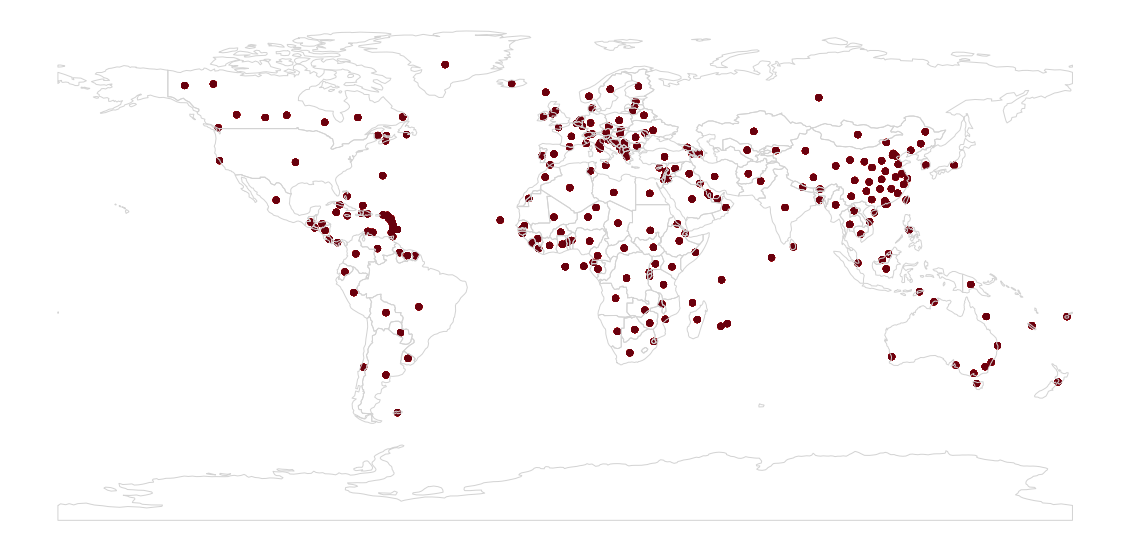

In [12]:
# Convert to geodataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat']))
world = world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
fig,ax = plt.subplots(figsize=(20,10))
ax.axis('off')
gdf.plot(cmap="Reds", ax=ax)
world.geometry.boundary.plot(color='lightgrey', edgecolor="black", linewidth=1, ax=ax)


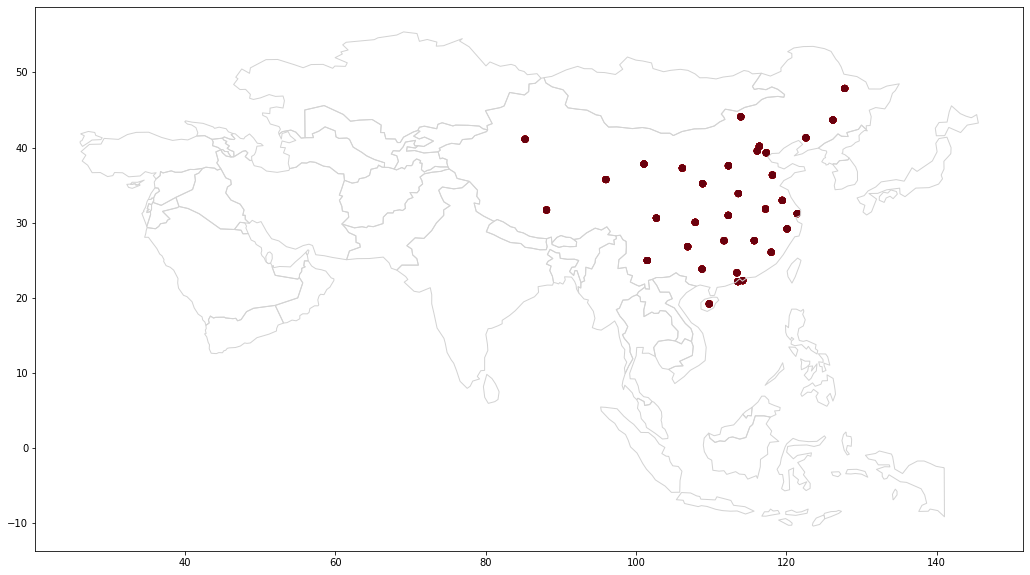

In [13]:
#only china
asia = world[world['continent']  == 'Asia']
fig,ax = plt.subplots(figsize=(20,10))
gdf[gdf['Country_Region'] == 'China'].plot(cmap="Reds", ax=ax)
asia.geometry.boundary.plot(color="lightgrey", edgecolor="black", linewidth=1, ax=ax)

In [14]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


In [15]:
df2 = df
df.to_csv("covid19_dataset_clean.csv")
df['cases_dates'] =  pd.to_datetime(df2['Date'])

Text(0.5, 1.0, 'Cumulative Daily Confirmed, Recovered and Death')

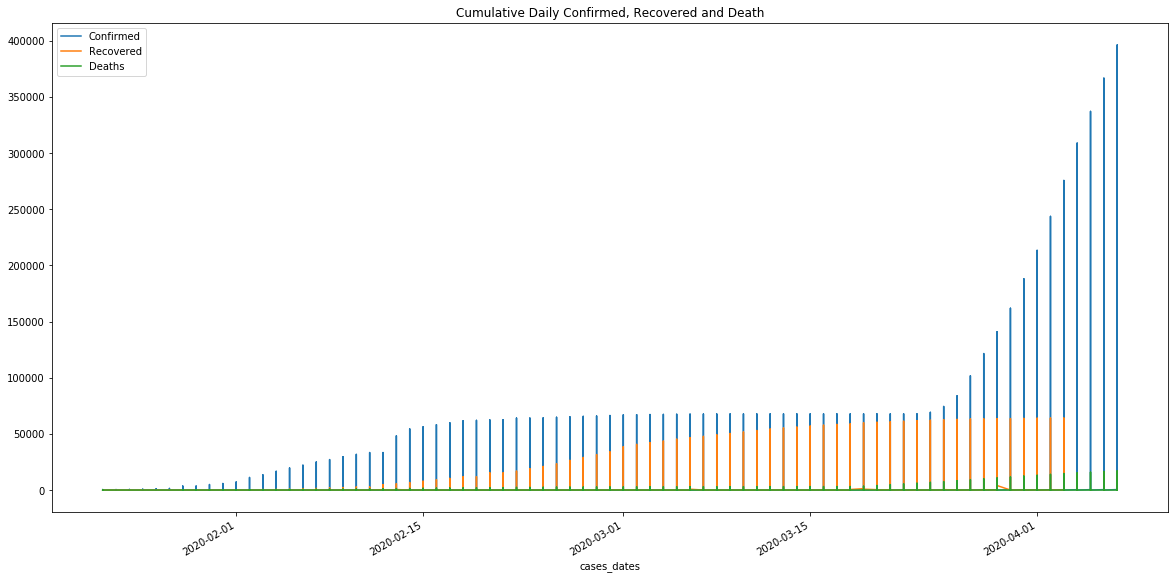

In [16]:
df2.set_index('cases_dates')[['Confirmed','Recovered','Deaths']].plot(figsize=(20,10))
plt.title('Cumulative Daily Confirmed, Recovered and Death')

Text(0.5, 1.0, 'Total Confirmed, Recovered and Death for each day')

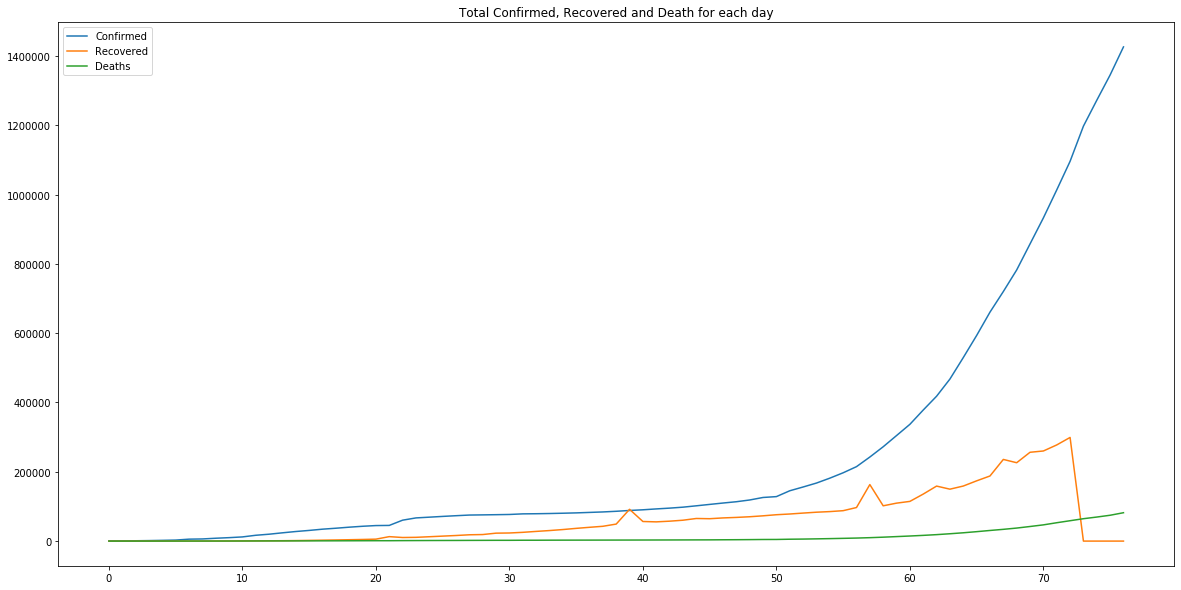

In [17]:
df_by_date = df2.set_index('cases_dates').groupby(['cases_dates']).sum().reset_index(drop=None)
df_by_date[['Confirmed', 'Recovered', 'Deaths']].plot(kind='line', figsize=(20,10))
plt.title('Total Confirmed, Recovered and Death for each day')

In [21]:
df_by_date = df_by_date.set_index('cases_dates')


KeyError: "None of ['cases_dates'] are in the columns"

                    Lat         Long  Confirmed  Recovered  Deaths
cases_dates                                                       
2020-01-22   5612.22129  5803.918873        555       28.0      17
2020-01-23   5612.22129  5803.918873        654       30.0      18
2020-01-24   5612.22129  5803.918873        941       38.0      26
2020-01-25   5612.22129  5803.918873       1434       83.0      42
2020-01-26   5612.22129  5803.918873       2118       63.0      56
...                 ...          ...        ...        ...     ...
2020-04-03   5612.22129  5803.918873    1095917   299107.0   58787
2020-04-04   5612.22129  5803.918873    1197405        0.0   64606
2020-04-05   5612.22129  5803.918873    1272115        0.0   69374
2020-04-06   5612.22129  5803.918873    1345101        0.0   74565
2020-04-07   5612.22129  5803.918873    1426096        0.0   81865

[77 rows x 5 columns]


Text(0.5, 1.0, 'Daily Confirmed and Death')

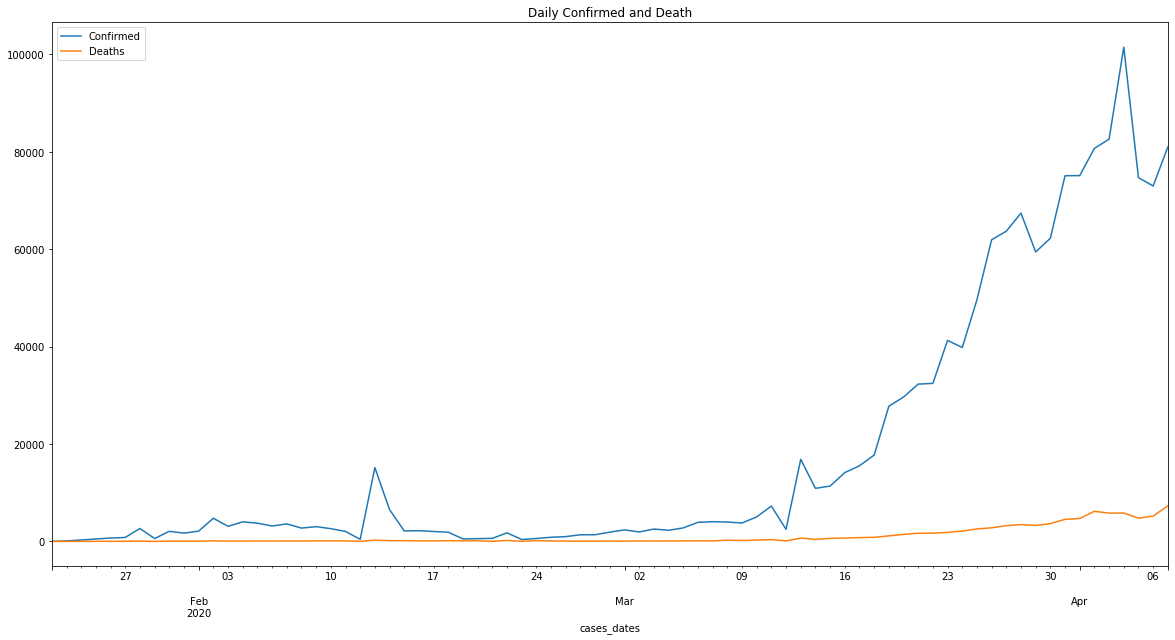

In [22]:
df_by_date[['Confirmed', 'Recovered','Deaths']].to_csv("")
daily_cases = df_by_date[['Confirmed', 'Deaths']]
diff = daily_cases.diff().fillna(0).plot(kind='line', figsize=(20,10))
plt.title("Daily Confirmed and Death")